We are already authenticated with NASA EDL
 Opening 6 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/6 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/6 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/6 [00:00<?, ?it/s]

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


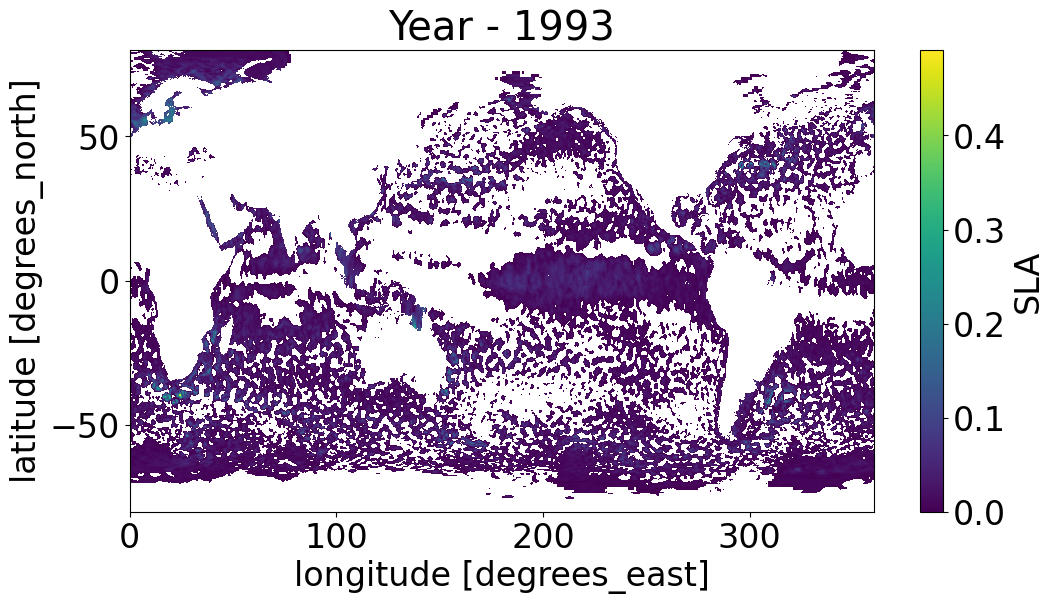

 Opening 7 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/7 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/7 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/7 [00:00<?, ?it/s]

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


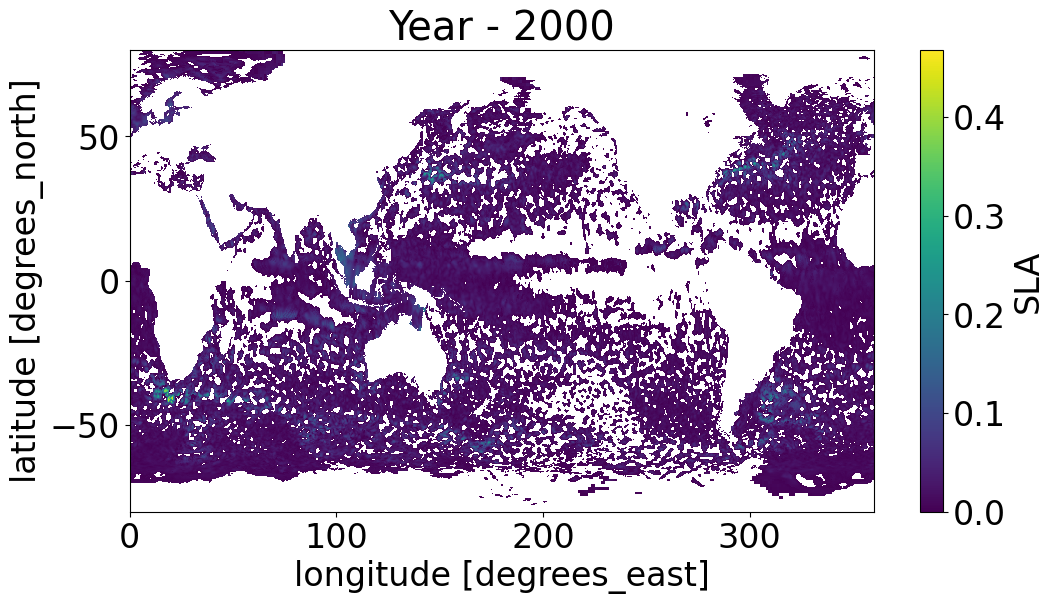

 Opening 6 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/6 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/6 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/6 [00:00<?, ?it/s]

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


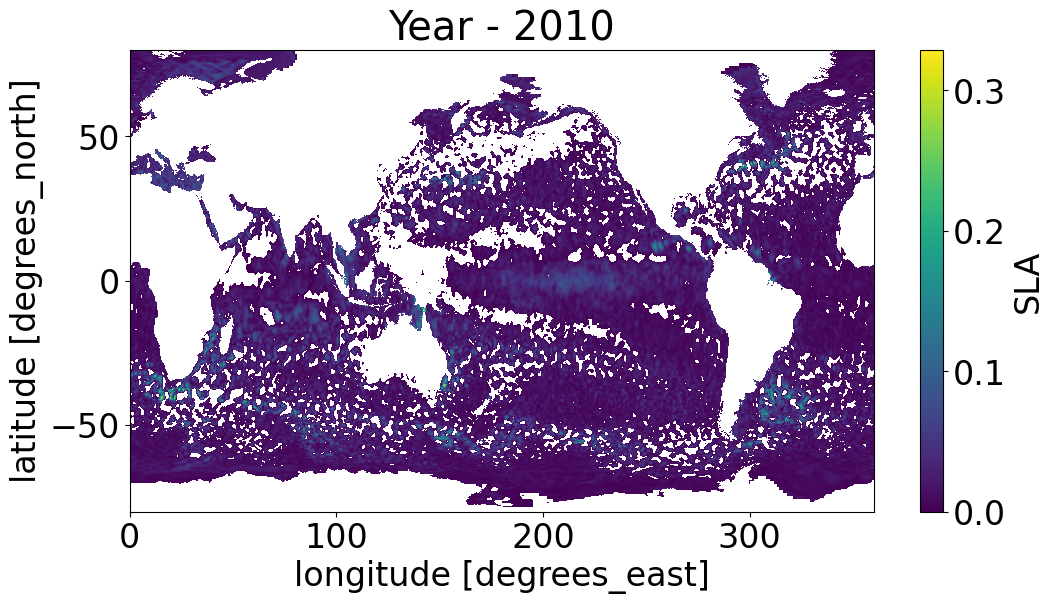

 Opening 7 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/7 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/7 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/7 [00:00<?, ?it/s]

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


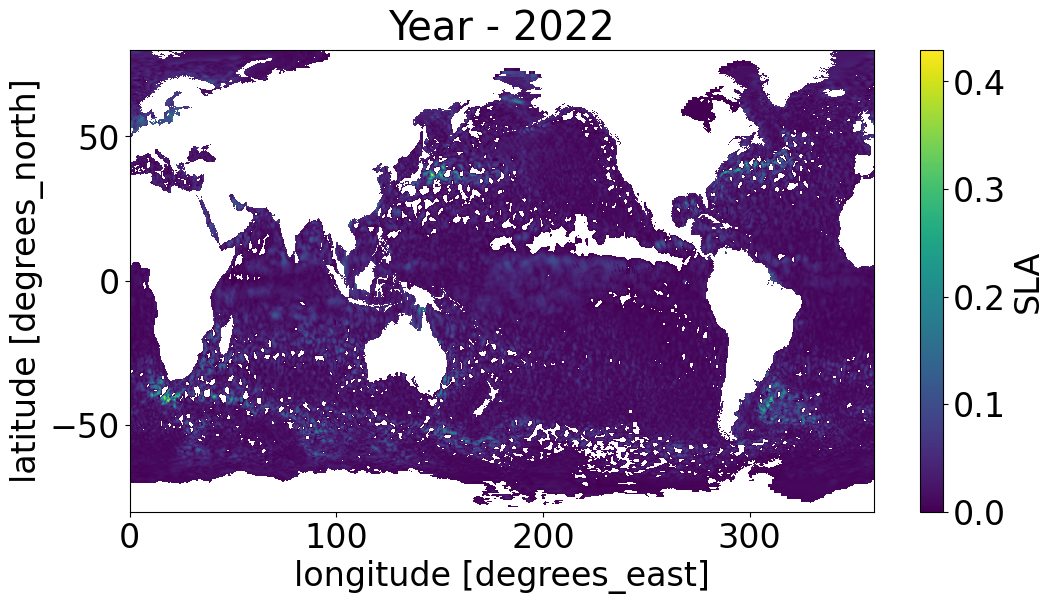

In [2]:
import earthaccess
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

years = ['1993', '2000', '2010', '2022']

auth = earthaccess.login()
# Are we authenticated?
if not auth.authenticated:
    # Ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

mpl.rcParams.update({'font.size': 24})

for year in years:
    granules = earthaccess.granule_query().short_name("SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL2205").temporal(f"{year}-01", f"{year}-2").get()
    ds = xr.open_mfdataset(earthaccess.open(granules), chunks={})
    plot = ds.SLA.where((ds.SLA >= 0) & (ds.SLA < 10)).std('Time').plot(figsize=(12, 6), x='Longitude', y='Latitude', cmap='viridis')
    plt.title(f"Year - {year}")
    plt.show()
